# Algorithm Complexity Analysis:

Linear Character Swap - Breadth First vs. Depth First for secret key guessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Time complexity

This is the time complexity test results for auto (best) algorithm selection. Since we can see that both of them are O(n) based on [their code](../../src/main/java/vn/rmit/cosc2658/development/mike_algo1/SecretKeyGuesser.java), the overall time complexity should also be O(n).

Test code (abbreviated):

```
    final int MAX_KEY_LENGTH = 512;

    for (int keyLength = 1; keyLength <= MAX_KEY_LENGTH; keyLength++) {
        SecretKey sk = new SecretKey(keyLength, 0);  // Seed = 0 to ensure reproducible results
        SecretKeyGuesser.start(sk, keyLength, SecretKeyGuesser.Algorithm.(...), false);
    }
```

In [2]:
timeData = {
    "Auto": pd.read_csv("../../testData/mikeAlgo1/randomKeyVariableLengthTestAuto.csv"),
    "DepthFirst": pd.read_csv("../../testData/mikeAlgo1/randomKeyVariableLengthTestDepthFirst.csv"),
    "BreadthFirst": pd.read_csv("../../testData/mikeAlgo1/randomKeyVariableLengthTestBreadthFirst.csv")
}

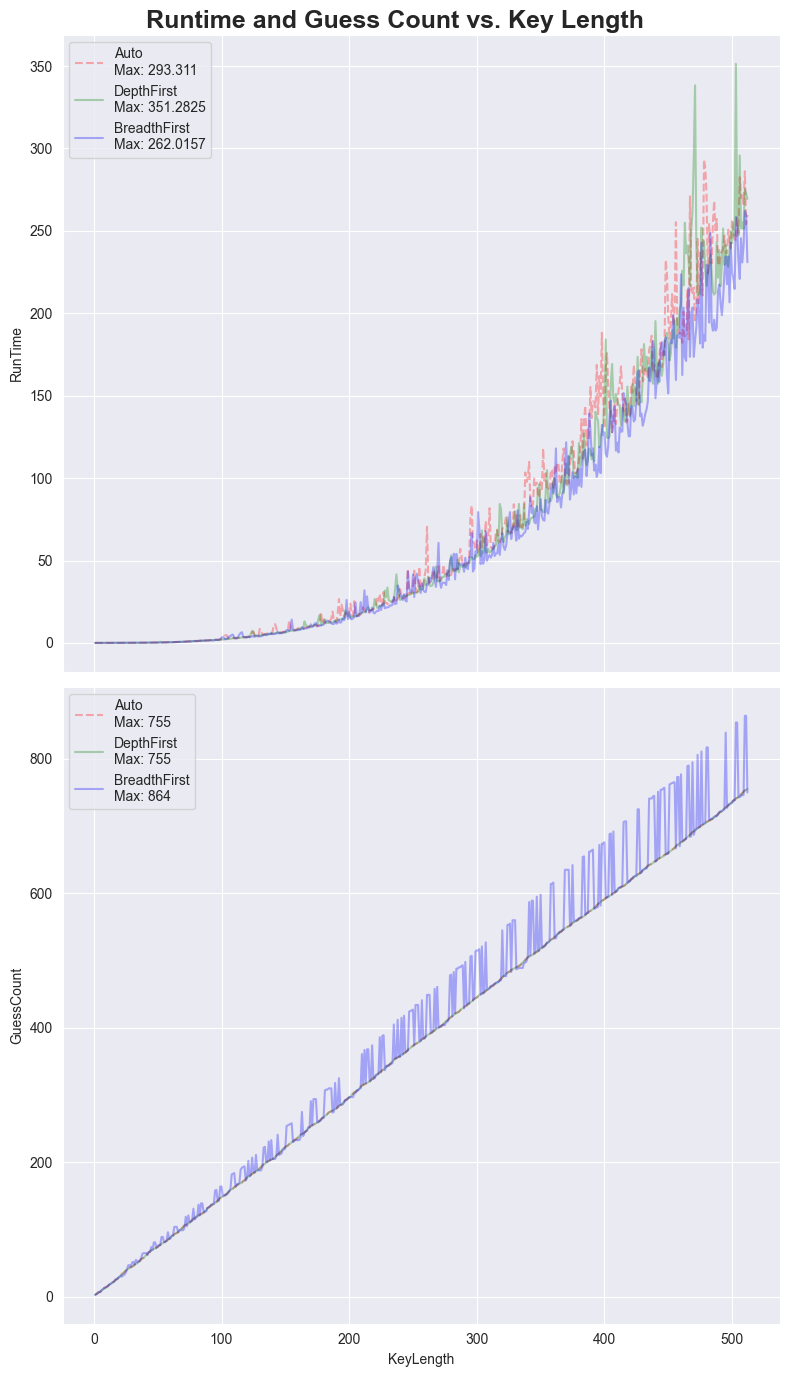

In [51]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex="all", figsize=(8, 14))

sns.lineplot(x=timeData["Auto"]["KeyLength"], y=timeData["Auto"]["RunTime"], ax=ax[0], c="red", alpha=0.3, label=f"Auto\nMax: {timeData['Auto']['RunTime'].max()}", linestyle="--")
sns.lineplot(x=timeData["Auto"]["KeyLength"], y=timeData["Auto"]["GuessCount"], ax=ax[1], c="red", alpha=0.3, label=f"Auto\nMax: {timeData['Auto']['GuessCount'].max()}", linestyle="--")

sns.lineplot(x=timeData["DepthFirst"]["KeyLength"], y=timeData["DepthFirst"]["RunTime"], ax=ax[0], c="green", alpha=0.3, label=f"DepthFirst\nMax: {timeData['DepthFirst']['RunTime'].max()}")
sns.lineplot(x=timeData["DepthFirst"]["KeyLength"], y=timeData["DepthFirst"]["GuessCount"], ax=ax[1], c="green", alpha=0.3, label=f"DepthFirst\nMax: {timeData['DepthFirst']['GuessCount'].max()}")

sns.lineplot(x=timeData["BreadthFirst"]["KeyLength"], y=timeData["BreadthFirst"]["RunTime"], ax=ax[0], c="blue", alpha=0.3, label=f"BreadthFirst\nMax: {timeData['BreadthFirst']['RunTime'].max()}")
sns.lineplot(x=timeData["BreadthFirst"]["KeyLength"], y=timeData["BreadthFirst"]["GuessCount"], ax=ax[1], c="blue", alpha=0.3, label=f"BreadthFirst\nMax: {timeData['BreadthFirst']['GuessCount'].max()}")

ax[0].legend(loc="upper left")
ax[1].legend(loc="upper left")

fig.suptitle("Runtime and Guess Count vs. Key Length", fontsize=18, fontweight="bold")
fig.tight_layout()

plt.show()
fig.savefig("images/TimeComplexity.png")